# CMS-COR-SAP. Exercise 5
By *Oleh Shkalikov*

In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

In [2]:
def mc(f, min, max, N, samp_dist, use_antithetic=False):
    #sampling 
    if(use_antithetic):
        u = stats.uniform.rvs(size=(N // 2))
        rvs = samp_dist.ppf(u)
        arvs = samp_dist.ppf(1 - u)
        rvs = np.concatenate([rvs, arvs], axis=0)
    else:
        rvs = samp_dist.rvs(size=(N))        

    # indicator    
    mask = (min <= rvs) & (rvs <= max)    
    rvs = rvs[mask]
    
    # result calcuation    
    y = f(rvs) / samp_dist.pdf(rvs)         
    return np.mean(y)

In [3]:
def mean_var(n_trials, f, min, max, N, samp_dist, use_antithetic=False, plot_box=False):
    results = np.empty(n_trials)
    for i in range(n_trials):
        results[i] = mc(f, min, max, N, samp_dist, use_antithetic)

    if plot_box:
        plt.boxplot(results)

    return np.mean(results), np.var(results, ddof=1)

## Variance of MC Integration vs Importance Sampling

In [4]:
f1a = lambda x: x**2

Mean 0.3327504571457483
Var 0.0007254117521617471


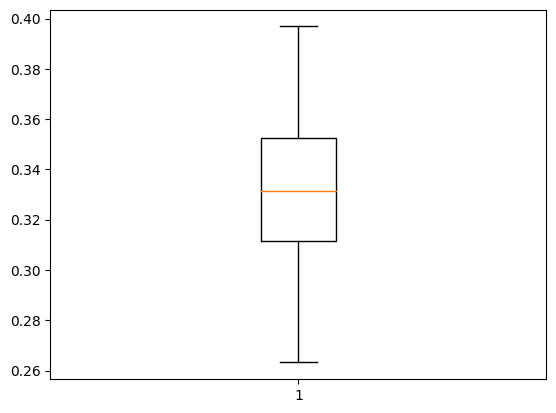

In [5]:
mean1a, var1a = mean_var(100, f1a, 0, 1, 100, stats.uniform, plot_box=True)
print(f'Mean {mean1a}')
print(f'Var {var1a}')

Mean 0.3334291243607996
Var 0.00015017382469627918


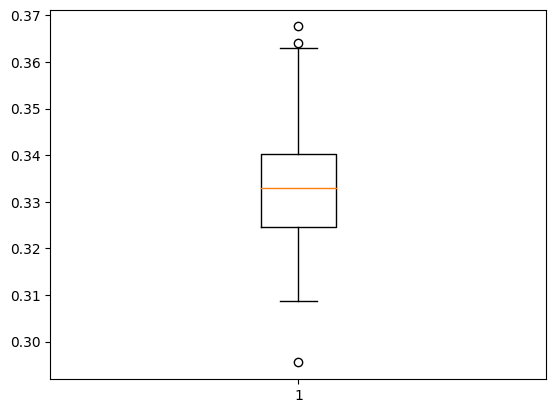

In [6]:
mean1ai, var1ai = mean_var(100, f1a, 0, 1, 100, stats.triang(c=1), plot_box=True)
print(f'Mean {mean1ai}')
print(f'Var {var1ai}')

In [7]:
f1b = lambda x: 10*x - x**2

Mean 166.42802675632515
Var 52.98754610301427


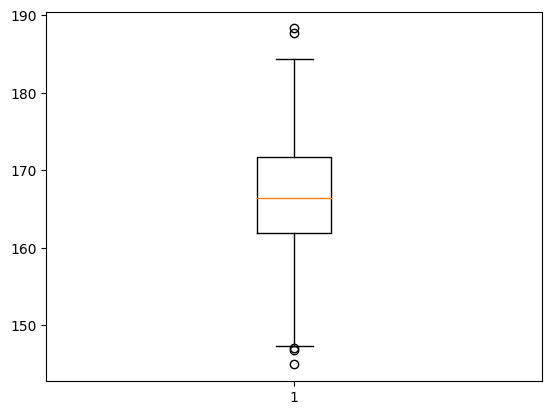

In [8]:
mean1b, var1b = mean_var(1000, f1b, 0, 10, 100, stats.uniform(loc=0, scale=10), plot_box=True)
print(f'Mean {mean1b}')
print(f'Var {var1b}')

Mean 168.93539352576488
Var 32.161619481855645


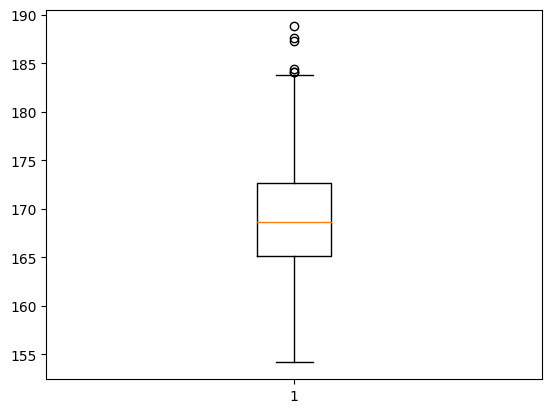

In [9]:
mean1bi, var1bi = mean_var(1000, f1b, 0, 10, 100, stats.norm(loc=5, scale=2), plot_box=True)
print(f'Mean {mean1bi}')
print(f'Var {var1bi}')

## Optimum Proposal Distribution

In [10]:
f2 = lambda x: x * stats.beta.pdf(x, 2, 2)

In [11]:
m = 20
means = np.empty(m+1)
vars = np.empty(m+1)
sigmas2 = np.empty(m+1)

for i in range(m + 1):
    sigma2 = 0.03 + ((0.3 - 0.03) / m) * i
    sampl_dist = stats.norm(loc=0.5, scale=sigma2)
    mean, var = mean_var(100, f2, 0, 1, 1000, sampl_dist)

    sigmas2[i] = sigma2
    means[i] = mean
    vars[i] = var

imin = np.argmin(vars)
print(f'Best Sigma square {sigmas2[imin]}')
print(f'Best Var {vars[imin]}')
print(f'Best Mean {means[imin]}')

Best Sigma square 0.25950000000000006
Best Var 5.922106285732185e-05
Best Mean 0.5272921341526434


<StemContainer object of 3 artists>

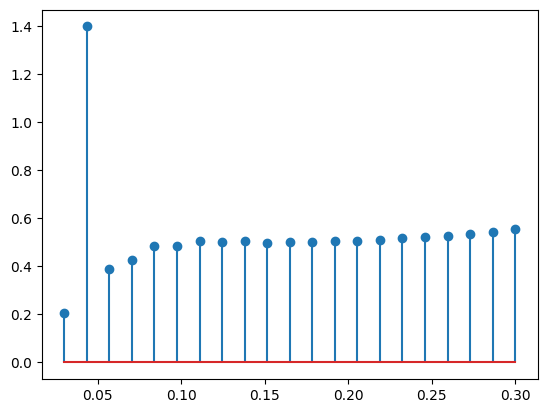

In [12]:
plt.stem(sigmas2, means)

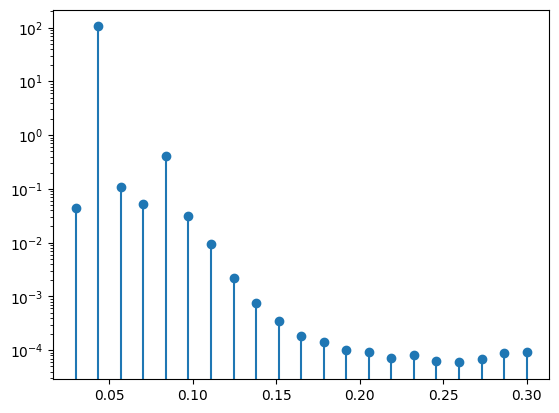

In [13]:
plt.stem(sigmas2, vars)
plt.yscale('log')

## Variance Reduction by Antithetic Variates

In [14]:
f3a = lambda x: 10 / (x + 1)

Mean without antithetic 6.944635469601477
Var without antithetic 0.019519235463342662


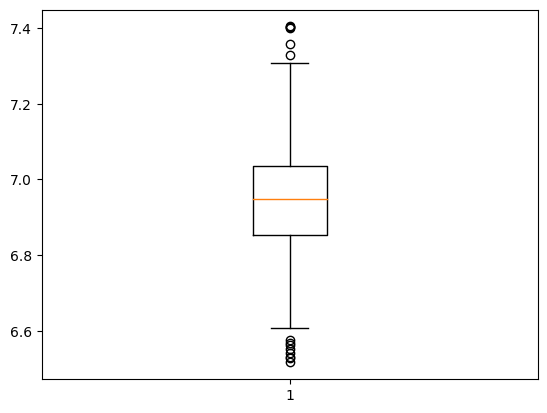

In [19]:
mean3a, var3a = mean_var(1000, f3a, 0, 1, 100, stats.uniform, use_antithetic=False, plot_box=True)
print(f'Mean without antithetic {mean3a}')
print(f'Var without antithetic {var3a}')

Mean with antithetic 6.932049898840219
Var with antithetic 0.0011476263976550535


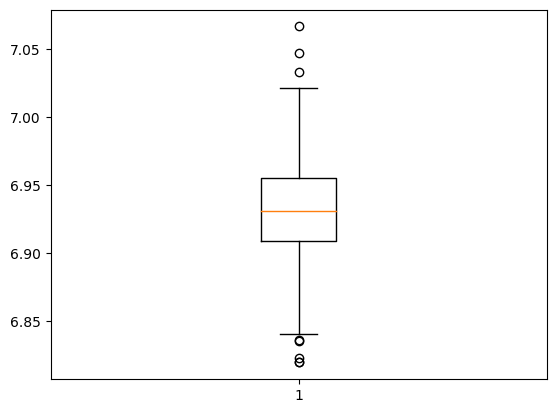

In [16]:
mean3aa, var3aa = mean_var(1000, f3a, 0, 1, 100, stats.uniform, use_antithetic=True, plot_box=True)
print(f'Mean with antithetic {mean3aa}')
print(f'Var with antithetic {var3aa}')

Mean with antithetic 168.80056308124
Var with antithetic 64.73537375653113


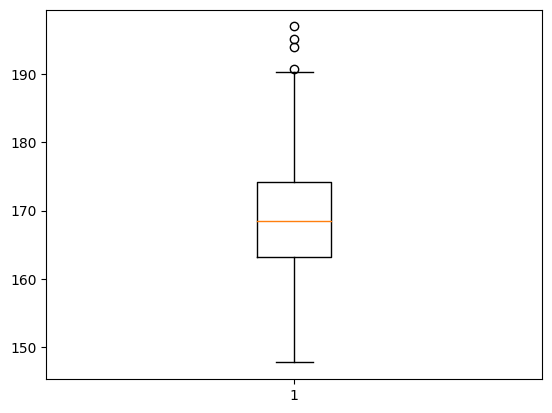

In [22]:
mean3ba, var3ba = mean_var(1000, f1b, 0, 10, 100, stats.norm(loc=5, scale=2), use_antithetic=True, plot_box=True)
print(f'Mean with antithetic {mean3ba}')
print(f'Var with antithetic {var3ba}')